# Medical Insurance Payout

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

age - Age of the customer
sex - Gender
bmi - Body Mass Index, an important health factor
children - number of children
smoker - whether the customer smokes or not
region - which region of the country the customer belongs to
charges - Target variable, the expenditure for the customer

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#импортируем библиотеки

In [307]:
med_df = pd.read_csv("med.csv")
med_df.head(10)
#выводим данные

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [283]:
med_df.shape

(1338, 8)

In [225]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [226]:
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [227]:
old_df_len = len(med_df)
new_df_len = len(med_df.dropna())

print(f'Начальный датасет: {old_df_len}')
print(f'Датасет очищенный от пустых данных: {new_df_len}')
print(f'Количество строк с пустыми данными: {old_df_len - new_df_len}')

Начальный датасет: 1338
Датасет очищенный от пустых данных: 1338
Количество строк с пустыми данными: 0


In [228]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [229]:
age = med_df['age'].value_counts().sort_values()

In [230]:
med_df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [231]:
med_df[med_df['age'] > 45]


,age,sex,bmi,children,smoker,region,charges
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
...,...,...,...,...,...,...,...
1329,52,male,38.60,2,no,southwest,10325.20600
1330,57,female,25.74,2,no,southeast,12629.16560
1332,52,female,44.70,3,no,southwest,11411.68500
1333,50,male,30.97,3,no,northwest,10600.54830


<AxesSubplot:ylabel='Frequency'>

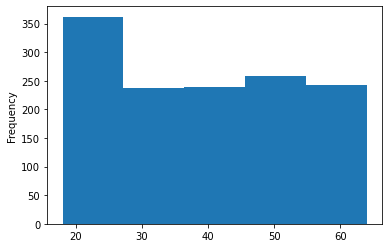

In [296]:
med_df['age'].plot(kind='hist', bins=5)

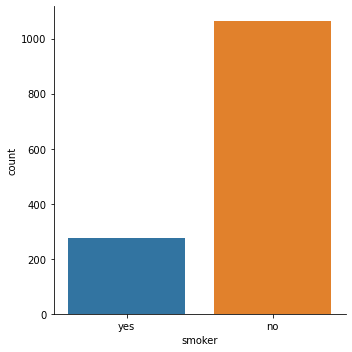

In [232]:
sns.catplot(x = 'smoker', data = med_df, kind = 'count')

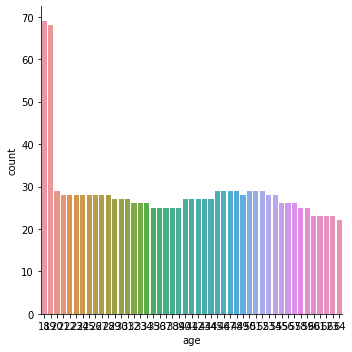

In [233]:
sns.catplot(x = 'age', data = med_df, kind = 'count')

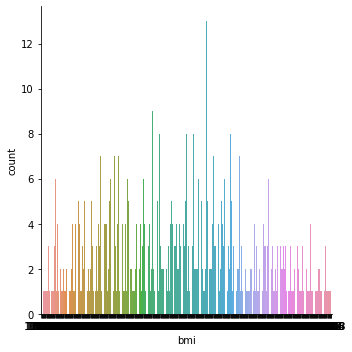

In [234]:
sns.catplot(x = 'bmi', data = med_df, kind = 'count')

In [309]:
med_df[med_df['bmi'] > 28] #869 человек имеют bmi выше нормы

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
6,46,female,33.44,1,no,southeast,8240.5896
8,37,male,29.83,2,no,northeast,6406.4107
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


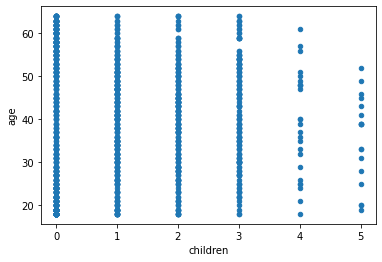

In [286]:
med_df.plot('children','age', kind='scatter')
plt.ticklabel_format(style='plain')
plt.ticklabel_format(useOffset=False)

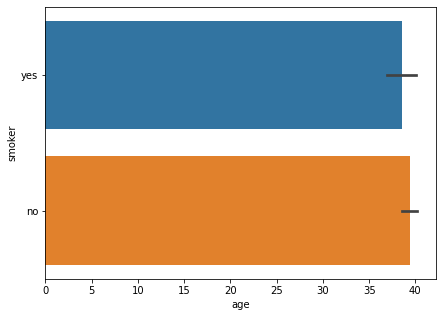

In [235]:
plot = plt.figure(figsize=(7,5))
sns.barplot(x = 'age', y = 'smoker', data = med_df)
plt.show()

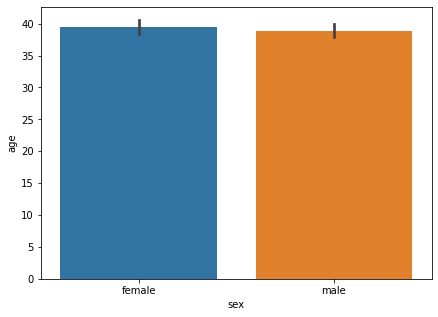

In [236]:
plot = plt.figure(figsize=(7,5))
sns.barplot(x = 'sex', y = 'age', data = med_df)
plt.show()

In [237]:
corr = med_df.corr()
X = [i for i in med_df.columns]
colorscale = [[0.0, '#3f7f93'],  [0.071, '#5890a1'], [0.143, '#72a1b0'], [0.214, '#8cb3bf'], [0.286, '#a7c5cf'], [0.357, '#c0d6dd'],
                  [0.429, '#dae8ec'], [0.5, '#f2f2f2'], [0.571, '#f7d7d9'], [0.643, '#f2bcc0'], [0.714, '#eda3a9'], [0.786, '#e8888f'],
                  [0.857, '#e36e76'], [0.929, '#de535e'], [1.0, '#d93a46']]

In [238]:
med_df.groupby('age')['charges'].agg(func=['mean', 'median'])

,mean,median
age,,
18,7086.217556,2198.189850
19,9747.909335,2135.891875
20,10159.697736,2459.720100
21,4730.464330,2254.423600
22,10012.932802,2641.155700
23,12419.820040,3594.538000
24,10648.015962,3045.137650
25,9838.365311,3750.148925
26,6133.825309,3388.882175


In [239]:
import plotly.graph_objects as go

heat = go.Heatmap(z=corr, x=X, y=X, xgap=1, ygap=1, colorscale=colorscale, colorbar_thickness=20, colorbar_ticklen=3)
layout = go.Layout(title_text='Корреляционная матрица', title_x=0.5,  width=600, height=600,  xaxis_showgrid=False, yaxis_showgrid=False,
                   yaxis_autorange='reversed')
fig = go.Figure(data=[heat], layout=layout)        
fig.show()

In [240]:
med_df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [241]:
med_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [242]:
med_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [243]:
colors = ['#d93a46', '#72a1b0', '#dae8ec', '#f7d7d9', '#a7c5cf', '#c0d6dd']
children = [0,1,2,3,4,5]

In [244]:

fig = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "bar"}]])
fig.add_trace(go.Pie(values = med_df.children.value_counts(), labels = med_df.children.value_counts().index, domain = dict(x=[0, 0.5]), 
                     marker = dict(colors = colors), hole = .3, name=''), row = 1, col = 1)
fig.add_trace(go.Bar(x = med_df.children.value_counts().index, y = med_df.children.value_counts(), name='', marker = dict(color = children,
                     colorscale = colors)), row = 1, col = 2)
fig.update_layout(showlegend = False)
fig.show()


In [245]:
my_bins = (2, 6.5, 8)
groups = ['плохое', 'хорошее']
med_df['bmi'] = pd.cut(med_df['bmi'], bins = my_bins, labels = groups)

In [246]:
print(med_df['age'].mean())
print(med_df['age'].median())
print(med_df['age'].mode())

39.20702541106129
39.0
0    18
Name: age, dtype: int64


In [153]:

lm = LinearRegression()

In [247]:
med_df.describe()

,age,children,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,1.094918,13270.422265
std,14.049960,1.205493,12110.011237
min,18.000000,0.000000,1121.873900
25%,27.000000,0.000000,4740.287150
50%,39.000000,1.000000,9382.033000
75%,51.000000,2.000000,16639.912515
max,64.000000,5.000000,63770.428010


In [248]:
med_df.groupby('sex')['age'].agg(func=['mean', 'median'])

,mean,median
sex,,
female,39.503021,40.0
male,38.917160,39.0


In [249]:
med_df.groupby('sex')['charges'].agg(func=['mean', 'median'])

,mean,median
sex,,
female,12569.578844,9412.96250
male,13956.751178,9369.61575


In [250]:
X = med_df['age'][0] 
Y = med_df['age'].mean()
sigma = med_df['age'].std(ddof=0)
print(X, Y, sigma)
z_score = (X - Y) / sigma
print(z_score)

19 39.20702541106129 14.04470903895454
-1.4387642602644801


In [251]:
med_df['z-score'] = scipy.stats.zscore(med_df['age'])

In [252]:
q3 = np.percentile(med_df['age'], 75)
q1 = np.percentile(med_df['age'], 25)
iqr = q3 - q1

In [253]:
iqr_bottom = q1 - 1.5*iqr
iqr_top = q3 + 1.5*iqr
print(iqr_bottom, iqr_top)

-9.0 87.0


In [254]:
med_df[med_df['age'] > iqr_top].shape

(0, 8)

In [255]:
iqr_no_outliers = med_df[med_df['age'] <= iqr_top]

In [256]:
print(iqr_no_outliers['age'].mean())

39.20702541106129


In [257]:
mean = med_df['age'].mean()
std = med_df['age'].std()
std_bottom = mean - 3*std
std_top = mean + 3*std
print(std_bottom, std_top)

-2.9428557265872257 81.3569065487098


In [258]:
med_df[med_df['age'] > std_top].shape

(0, 8)

In [259]:
std_no_outliers = med_df[med_df['age'] <= std_top]

In [260]:

print(std_no_outliers['age'].mean())

39.20702541106129


In [261]:
import scipy.stats

In [262]:

scipy.stats.zscore(med_df['age'])

0      -1.438764
1      -1.509965
2      -0.797954
3      -0.441948
4      -0.513149
          ...   
1333    0.768473
1334   -1.509965
1335   -1.509965
1336   -1.296362
1337    1.551686
Name: age, Length: 1338, dtype: float64

In [263]:
med_df['z-score'] = scipy.stats.zscore(med_df['age'])

In [264]:

med_df[med_df['z-score'] > 45].head()

,age,sex,bmi,children,smoker,region,charges,z-score


In [265]:

med_df[med_df['z-score'] > 3].shape

(0, 8)

In [266]:

med_df_new = med_df[['smoker','charges']].copy()

In [267]:
med_df_new.head ()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [268]:
med_df_new["smoker"].replace({"no":0,"yes":1}, inplace=True)

In [269]:
no = med_df_new[med_df_new["smoker"]==0]["charges"]
yes = med_df_new[med_df_new["smoker"]==1]["charges"]

In [270]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667

In [271]:
no.var()

35925420.49611172

In [272]:
yes.var()

133207311.20634921

In [273]:
n_1 = len(no)
n_2 = len(yes)
print(n_1, n_2)

1064 274


In [275]:
p_value = scipy.stats.ttest_ind(no, yes, equal_var=False)[-1]

In [276]:
hypothesis_check(p_value, t_critical)

Отвергаем Н0. Разница между средними статистически значима.
